Shor Simulation
====

Application of the quantum part of the Shor algorithm

In [1]:
import quantum
import classical

import math
import random
from fractions import Fraction

import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = int(input("n: "))
x = int(input("x: "))

t = math.floor(2 * math.log2(n)) + 1

n_states = 2 ** t
prob = np.empty(n_states, dtype=np.double)

n: 21
x: 2


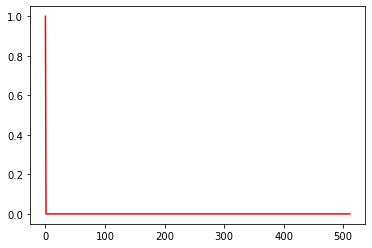

In [3]:
prob = quantum.phi_0(prob, n_states)
plt.plot(prob, 'r')
plt.show()

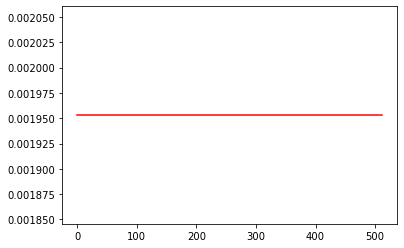

In [4]:
prob = quantum.phi_1(prob, n_states)
plt.plot(prob, 'r')
plt.show()

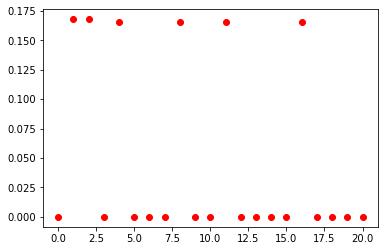

In [5]:
freq_powers = quantum.phi_2(x, n, prob, n_states)
plt.plot(freq_powers, 'ro')
plt.show()

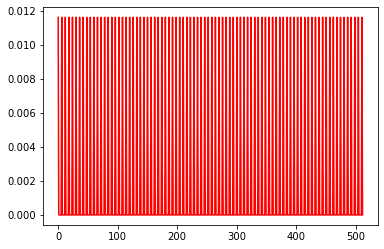

In [6]:
prob = quantum.phi_3(x, n, prob, n_states)
plt.plot(prob, 'r')
plt.show()

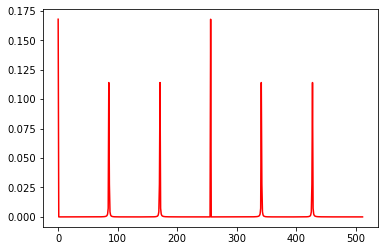

In [7]:
prob = quantum.phi_4(prob, n_states)
plt.plot(prob, 'r')
plt.show()

[F] : MEASURED : 0
[T] : MEASURED : 427


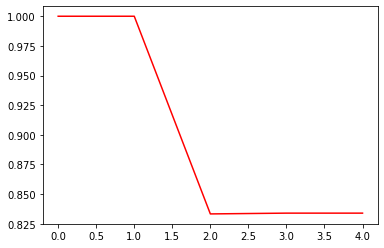

Candidate: 6
r = 6


In [8]:
assert(x != 1)
m = np.random.choice(range(2**t), p=prob)
while m == 0:
    print("[F] : MEASURED : 0")
    m = np.random.choice(range(2**t), p=prob)
print("[T] : MEASURED : {}".format(m))

convergents = classical.get_convergents(m, n_states)
plt.plot(convergents, 'r')
plt.show()

r = 1
for c in convergents:
    if c.denominator < n:
        r = c.denominator
        
x = classical.power_mod(x, r, n)

print("Candidate: {}".format(r))

if x == 1:
    print("r = {}".format(r))
else:
    print("Not found yet\nRerun notebook with x = {}".format(x))